# Project: Investigate a Dataset - Medical Appointment No-Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The **"Medical Appointment No-shows"** dataset consists of over a 100 thousand rows containing data about medical appointments at public health facilities in Brazil. It is hosted on Kaggle [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments). Each row contains data about patient and appointment ID, the appointment date and the day it was scheduled, whether the patient had disabilities / illnesses and the neighbourhood where the appointment was scheduled to hold. The dependent variable here is a record of whether the patient showed up for the appointment or not.

The  14 columns / features in this dataset are:

1.  **PatientID:** The unique patient ID
2.  **AppointmentID:** Identifier for each appointment
3.  **Gender:** Male or female
4.  **ScheduledDay:** The day and time a call was placed to schedule an appointment
5.  **AppointmentDay:** The day to visit the health facility
6.  **Age:** The age of the patient
7.  **Neighbourhood:** Where the appointment took place
8.  **Scholarship:** A recipient of the government scholarship for indigents or not
9.  **Hipertension:** Do they have hypertension?
10. **Diabetes:** Diabetic?
11. **Alcoholism:** Alcoholic?
12. **Handcap:** Handicapped?
13. **SMS_received:** Did the person/patient receive SMS messages regarding the appointment?
14. **No-show:** Whether the person met or missed the appointment; **"No"** means the person showed up for appointment while **"Yes"** means a missed appointment.


### Question(s) for Analysis
>This investigation aims to explore the age and gender characteristics of patients / clients who show up for their appointments as opposed to those who do not. Furthermore, I would examine if particular days of the week have more appointment days than others and identify possible trends in the number of appointments per day for the date range in the dataset.
I would also look at a possible correlation between receiving an SMS or not to increased numbers showing up for their appointments.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline rendering of plots
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines for inspection.
data = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
# Get no of rows and columns
print('No of rows:', data.shape[0])
print('No of columns:', data.shape[1])

No of rows: 110527
No of columns: 14


In [4]:
# General info about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* There are no missing values in this dataset.
* The `ScheduledDay` and `AppointmentDay` columns need to be converted from object to the datetime data type.
* I prefer that the `PatientId` and `AppointmentID` columns be converted to the string (or object) data type since they are unique identifiers not quantitative variables; calculating descriptive statistics, e.g. mean, for these columns is not meaninful
* Some columns need spelling corrections e.g. `Hipertension` and `Handcap`.
* To ensure consistency in column labelling, I will seperate words with underscores after making column names all lower case.
* I will replace the values in the columns, `Scholarship` to `SMS_received`, with 'Yes' or 'No'. The current values are useful for machine learning modelling but we are only limited to descriptive statistics here.

In [5]:
# Describe the data including non-numerical columns
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,110527,NaN,NaN,NaN,1.47496e+14,2.56095e+14,39217.8,4.17261e+12,3.17318e+13,9.43917e+13,9.99982e+14
AppointmentID,110527,NaN,NaN,NaN,5.67531e+06,71295.8,5.03023e+06,5.64029e+06,5.68057e+06,5.72552e+06,5.79048e+06
Gender,110527,2,F,71840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,110527,NaN,NaN,NaN,37.0889,23.1102,-1,18,37,55,115
Neighbourhood,110527,81,JARDIM CAMBURI,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,110527,NaN,NaN,NaN,0.0982656,0.297675,0,0,0,0,1
Hipertension,110527,NaN,NaN,NaN,0.197246,0.397921,0,0,0,0,1
Diabetes,110527,NaN,NaN,NaN,0.0718648,0.258265,0,0,0,0,1


We note the following from the above:
* There are more females in this dataset: 71,840
* There are no specific times given on the appointment days. This may be due to the fact that the client can walk in anytime during official hours on their appointment days.
* The mean age is 37.09 with a minimum age of -1. This is impossible but since the median age is also 37, this suggest an outlier that needs to be investigated for possible removal or imputation.
* 75% of patients are below 55 years
* The maximum age is 115 years. Are there ages equal to 0 in this dataset?
* There are 81 unique neighbourhoods in this dataset with **Jardim Camburi** being the most frequent appointment neighbourhood.
* The `Handcap` column has a max value of 4 but it should be binary from the author's official documentation. Two conflicting statements from the dataset author regarding this can be seen [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) and [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/30844). Further exploration should help to make a decision on this.
* Most of the appointments (88,208) were met.

In [6]:
# Are there duplicated rows?
print('No of duplicated rows:', data.duplicated().sum())

No of duplicated rows: 0


In [7]:
# Get no of unique values in the first two columns
print('No of unique values in the `{}` column: {:,}'.format(data.columns[0], data.PatientId.nunique()))
print('No of unique values in the `{}` column: {:,}'.format(data.columns[1], data.AppointmentID.nunique()))

No of unique values in the `PatientId` column: 62,299
No of unique values in the `AppointmentID` column: 110,527


In [8]:
# Check the most number of appointments scheduled by one person
data.PatientId.value_counts().max()

88

* There are no duplicate rows.
* 62,299 patients are captured in the data
* Each appointment ID is unique but there are patients with repeat appointments. We could further explore why a patient has 88 appointments over the data collection period. 

In [9]:
# View row(s) where age equals -1
data.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


* This row can be dropped since it's most likely a single data entry error

In [10]:
# Check if there are ages equal to zero
print('No of samples with age equal 0:', data.query('Age == 0').shape[0])

No of samples with age equal 0: 3539


In [11]:
# View a sample of these rows
data.query('Age == 0').sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
31497,1.438856e+13,5664003,F,2016-05-05T10:55:09Z,2016-05-19T00:00:00Z,0,VILA RUBIM,0,0,0,0,0,0,No
27522,6.848454e+14,5555094,F,2016-04-07T09:28:46Z,2016-05-05T00:00:00Z,0,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
97856,9.251253e+13,5776251,F,2016-06-06T10:44:05Z,2016-06-07T00:00:00Z,0,SÃO JOSÉ,0,0,0,0,0,0,No
104053,1.788818e+13,5684715,M,2016-05-11T09:01:19Z,2016-06-02T00:00:00Z,0,SANTA MARTHA,0,0,0,0,0,1,No
69996,1.781927e+12,5688787,M,2016-05-12T07:39:12Z,2016-05-12T00:00:00Z,0,SANTOS REIS,0,0,0,0,0,0,No


In [12]:
# Check for number of uniques values per column (or variable) in this subset of ages
data.query('Age == 0').nunique()

PatientId         2082
AppointmentID     3539
Gender               2
ScheduledDay      3517
AppointmentDay      26
Age                  1
Neighbourhood       75
Scholarship          2
Hipertension         1
Diabetes             1
Alcoholism           1
Handcap              2
SMS_received         2
No-show              2
dtype: int64

* There are about 3500 patients in this group
* All of them have **no** hypertension, diabetes or problems of alcoholism as seen in the number of unique values in these columns; I assume this means they are children less than a year old, so I will leave these rows in the data.

In [13]:
# What is the frequency of values in the `Handcap` column?
data.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

* Most patients have no handicap.
* Assuming one of the explanations given by the dataset author that values above 1 are errors, adding them to category 1 will not significantly change the proportion of people with handicap to those without. This will also be in keeping with the second explanation in which the author says they are counts of the various disabilities the patient has.
* This column will be cleaned by replacing values greater than 1 with 1; the values 2, 3 and 4 will be replaced with 1.

### Data Cleaning

In [14]:
# Correct column name spellings, change to lower case and seperate words with underscore.
new_col_names = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
                 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 
                 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
data.columns = new_col_names
data.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [15]:
# Convert columns containing dates to the datetime data type.
for col in ['scheduled_day', 'appointment_day']:
    data[col] = pd.to_datetime(data[col])

In [16]:
# Convert the values in the first 2 columns to `strings`.
for col in ['patient_id', 'appointment_id']:
    data[col] = data[col].astype('str')

In [17]:
# Replace values in the 'handicap' column as mentioned above
data['handicap'] = data.handicap.apply(lambda x: 1 if x in [2, 3, 4] else x)

data.handicap.unique()

array([0, 1])

In [18]:
# Replace values in the columns 'scholarship' to 'sms_received' with 'Yes' or 'No'.
for col in data.columns[7:13]:
    data[col] = data[col].replace(to_replace={0:'No', 1:'Yes'})

In [19]:
# Remove row where age is -1
data = data.drop(index=data.query('age == -1').index)
data.query('age == -1').index # Index should be empty

Int64Index([], dtype='int64')

In [20]:
# Confirm changes
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110526 non-null object
appointment_id     110526 non-null object
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null object
hypertension       110526 non-null object
diabetes           110526 non-null object
alcoholism         110526 non-null object
handicap           110526 non-null object
sms_received       110526 non-null object
no_show            110526 non-null object
dtypes: datetime64[ns](2), int64(1), object(11)
memory usage: 12.6+ MB


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No


* The cleaning steps above were sucessful. However, let's check the time span of the data included in this dataset.

In [21]:
# What is the time span of the days in which scheduling occurred?
print('Scheduling spanned {} days'.format((data.scheduled_day.max() - data.scheduled_day.min()).days), end=' ')
print('from {:%B %d, %Y} to {:%B %d, %Y}'.format(data.scheduled_day.min(), data.scheduled_day.max()))

Scheduling spanned 211 days from November 10, 2015 to June 08, 2016


In [22]:
# What is the time span of appointment days?
print('Appointments span {} days'.format((data.appointment_day.max() - data.appointment_day.min()).days), end=' ')
print('from {:%B %d, %Y} to {:%B %d, %Y}'.format(data.appointment_day.min(), data.appointment_day.max()))

Appointments span 40 days from April 29, 2016 to June 08, 2016


In [23]:
# Are there instances of individuals being given, at least, a 5-month appointment?
print('There are {} instances of such appointments'.format(
    ((data.appointment_day - data.scheduled_day) > pd.Timedelta(150, 'd')).sum()))

There are 56 instances of such appointments


In [24]:
# Are there entries where appointments occurred before scheduling?
print('{} entries'.format((data.appointment_day < pd.to_datetime(data.scheduled_day.dt.date)).sum()))

# View rows where the above occurred.
data[(data.appointment_day < pd.to_datetime(data.scheduled_day.dt.date))]

5 entries


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27033,7.83927266175e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,No,No,No,No,Yes,No,Yes
55226,7.89629396787e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,No,No,No,No,Yes,No,Yes
64175,2.425225839e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,No,No,No,No,No,No,Yes
71533,9.98231581612e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,No,No,No,No,No,No,Yes
72362,3.78748196682e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,No,No,No,No,No,No,Yes


* These rows will be dropped since it's impossible for an appointment to occur before scheduling it.

In [25]:
# Drop the above rows and reset the index and rename the DataFrame
index_to_drop = data[(data.appointment_day < pd.to_datetime(data.scheduled_day.dt.date))].index
appointments = data.drop(index=index_to_drop).reset_index(drop=True)

In [26]:
# Confirm  reduction in no of rows
appointments.shape

(110521, 14)

* The number of rows are reduced by five; let's do a final inspection.

In [27]:
appointments.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
patient_id,110521,62298,8.22145925426e+14,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appointment_id,110521,110521,5703129,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,110521,2,F,71836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scheduled_day,110521,103543,2016-05-06 07:09:54,24,2015-11-10 07:13:56,2016-06-08 20:07:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appointment_day,110521,27,2016-06-06 00:00:00,4691,2016-04-29 00:00:00,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,110521,NaN,NaN,NaN,NaN,NaN,37.0894,23.1099,0,18,37,55,115
neighbourhood,110521,81,JARDIM CAMBURI,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scholarship,110521,2,No,99660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hypertension,110521,2,No,88720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diabetes,110521,2,No,102578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We see that the mean and median age is still 37.
* Also, most patients received SMS messages.

<a id='eda'></a>
## Exploratory Data Analysis


### What are the age and gender characteristics of patients who do not show up for their appointments and vice-versa?

In [28]:
# Define a function to add labels and titles.
def add_labels(title='', xlabel='', ylabel='', tsize=16):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=tsize)
    return

# A function to get groupby counts and proportions for specified columns/variables
def get_counts_props(groupby_col):
    """
    Takes a string or list of strings as input denoting column names and
    returns a a tuple of counts and proportions of values in the specified
    columns
    """
    
    counts = appointments.groupby(groupby_col)['patient_id'].count()
    totals = appointments.groupby(groupby_col[0])['patient_id'].count()
    props = counts / totals
    
    return counts, props

# Set a default figure size
plt.rcParams['figure.figsize'] = (9,4)

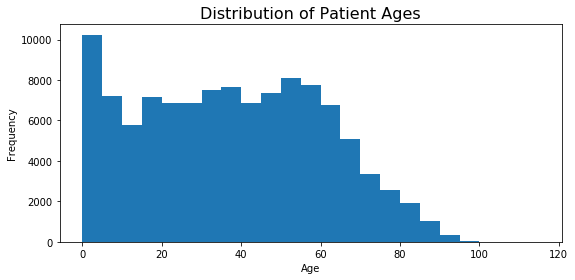

In [29]:
# Plot distribution of patient ages
bins = np.arange(0, appointments.age.max()+5, 5)
appointments.age.plot.hist(bins=bins)
add_labels('Distribution of Patient Ages', 'Age', 'Frequency');

* Patients between age 0 to 5 are the most common demographic.
* There's a fairly stable representation across ages from 5 to 65 and a significant drop in frequency after 70 years; a right-skewed distribution.

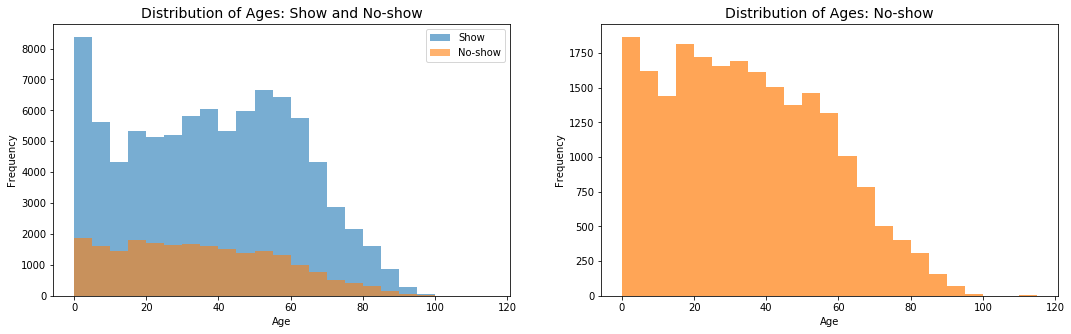

In [30]:
# Is there a marked difference in age distribution for patients who did not show up for appointments?

# Split data into those who showed and those who didn't
show = appointments.query('no_show == "No"').copy()
no_show = appointments.query('no_show == "Yes"').copy()

# plot subplots of both and then only no-shows
plt.figure(figsize=(18,5))
base_color = sns.color_palette()[0]
color1 = sns.color_palette()[1]

# Histogram 1
plt.subplot(121)
plt.hist(show.age, bins=bins, alpha=0.6, label='Show')
plt.hist(no_show.age, bins=bins, alpha=0.6, label='No-show', color=color1)
add_labels('Distribution of Ages: Show and No-show', 'Age', 'Frequency', tsize=14)
plt.legend();

# Histogram 2
plt.subplot(122)
plt.hist(no_show.age, bins=bins, alpha=0.7, label='No-show', color=color1)
add_labels('Distribution of Ages: No-show', 'Age', 'Frequency', tsize=14);

* As previously noted, more patients showed up for their appointments than not.
* The age distribution for no-shows roughly matches that for 'shows' with a corresponding right skew despite a lower frequency count across ages.

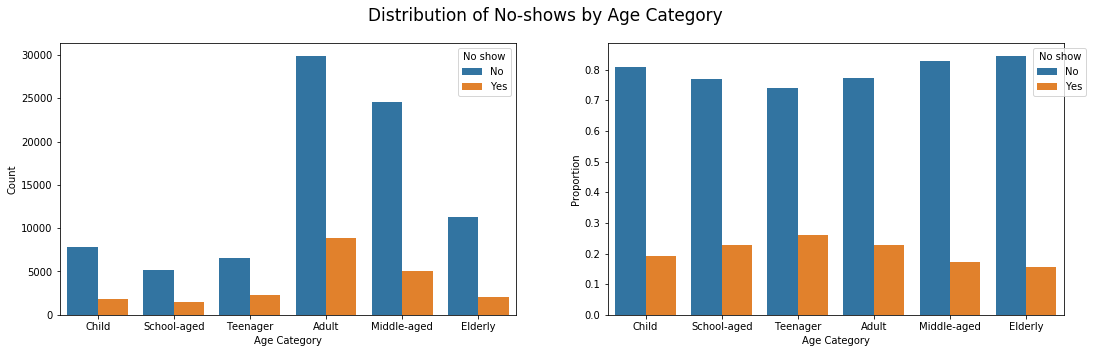

In [31]:
# Do certain age categories meet up with their appointments more than others?

# Get age categories
age_bins = [0, 6, 11, 18, 45, 65, 120]
age_labels = ['Child', 'School-aged', 'Teenager', 'Adult', 'Middle-aged', 'Elderly']
appointments['age_category'] = pd.cut(appointments.age, bins=age_bins, labels=age_labels)

# Get counts and proportions per age category and appointment status
age_cat_counts, age_cat_props = get_counts_props(['age_category', 'no_show'])

# Plot subplots
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(x='age_category', y='patient_id', hue='no_show', data=age_cat_counts.reset_index())
add_labels(xlabel='Age Category', ylabel='Count')
plt.legend(title='No show', loc=1);

plt.subplot(122)
sns.barplot(x='age_category', y='patient_id', hue='no_show', data=age_cat_props.reset_index())
add_labels(xlabel='Age Category', ylabel='Proportion')
plt.legend(title='No show', bbox_to_anchor=(1.06, 1))
plt.suptitle('Distribution of No-shows by Age Category', fontsize=17);

* Adults have the highest counts of patient categories that met their appointments as well as those who didn't. This is followed by the middle-aged and elderly demographics.
* Teenagers however are the highest proportion of those who do not show up for their appointments. The elderly met their appointments the most having, correspondingly, the lowest proportion of no-shows.

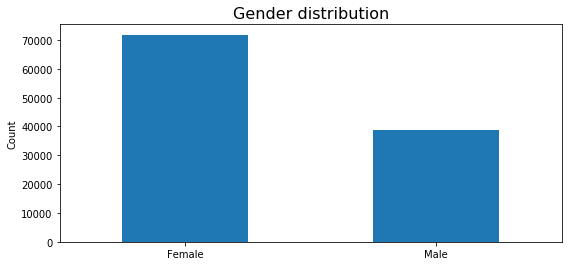

In [32]:
# View the gender distribution
appointments.gender.value_counts().plot.bar(rot=0, color=base_color)
add_labels('Gender distribution', ylabel='Count')
plt.xticks([0,1], ['Female', 'Male']);

* There are almost twice as much females as males represented in the dataset.

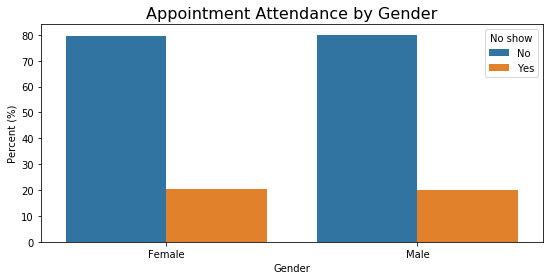

In [33]:
# Do males account for more of the no-shows or vice-versa?
gender_appt_cnts, gender_appt_props = get_counts_props(['gender', 'no_show'])
gender_appt_pcent = gender_appt_props * 100

sns.barplot(data=gender_appt_pcent.reset_index(), x='gender', y='patient_id', hue='no_show')
add_labels('Appointment Attendance by Gender', 'Gender', 'Percent (%)')
plt.xticks([0,1], ['Female', 'Male']);
plt.legend(title='No show');

* There are similar rates of missed appointments (around 20%) for both sexes.

### What days of the week do people show up more? Are there patterns in daily appointments for shows and no-shows?

In [34]:
# Create a column containing the weekday names for each date
appointments['appt_day_name'] = appointments.appointment_day.dt.day_name()

# View frequency table for days of the week
appointments.groupby('appt_day_name')['patient_id'].count().sort_values(ascending=False)

appt_day_name
Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: patient_id, dtype: int64

* Appointments are hardly scheduled for Saturdays and no appointments were scheduled for Sunday. This may be due to Sunday being an official weekend in Brazil

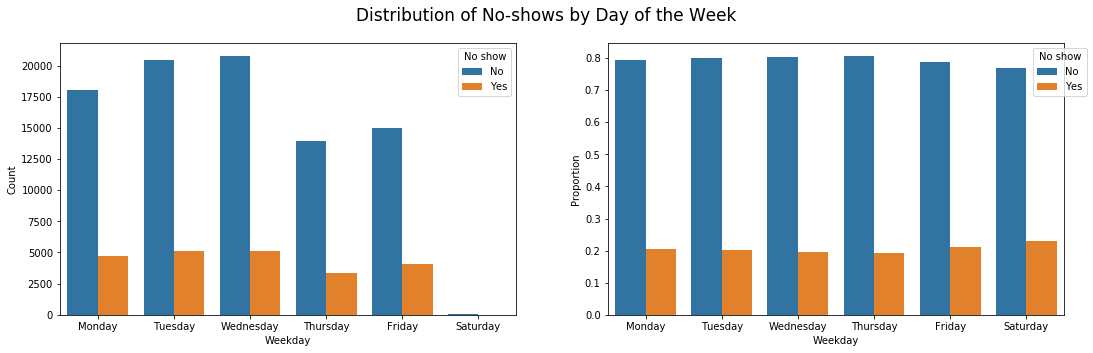

In [35]:
# View aggregate no of appointments for each weekday for the entire dataset splitting into shows and no-shows.
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Get counts and proportions
wkday_count, wkday_props = get_counts_props(['appt_day_name', 'no_show'])

# Plot
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(x='appt_day_name', y='patient_id', hue='no_show', order=week_days,
            data=wkday_count.reset_index())
add_labels(xlabel='Weekday', ylabel='Count')
plt.legend(title='No show', loc=1);

plt.subplot(122)
sns.barplot(x='appt_day_name', y='patient_id', hue='no_show', order=week_days,
            data=wkday_props.reset_index())
add_labels(xlabel='Weekday', ylabel='Proportion')
plt.legend(title='No show', bbox_to_anchor=(1.06, 1))
plt.suptitle('Distribution of No-shows by Day of the Week', fontsize=17);

* Appointments seem to be met more during the first three days of the week with a reduction on Thursdays and Fridays when viewing counts with Wednesday having the aggregate highest no of appointments met.
* The bar plot showing proportions on the right however shows an approximately 20% to 80% ratio across categories in those who missed their appointments compared to those who didn't. This is the same ratio seen as for gender above.

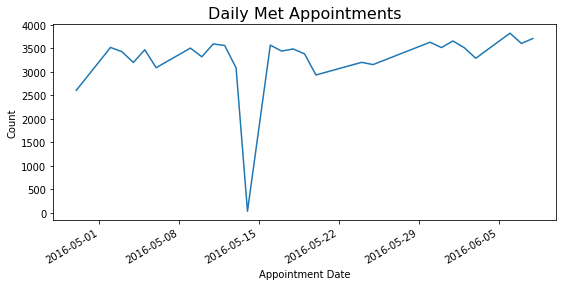

In [36]:
# Are there interesting patterns in the daily counts of people who attended their appointments and vice-versa?
show.groupby('appointment_day')['patient_id'].count().plot.line()
add_labels('Daily Met Appointments', 'Appointment Date', 'Count');

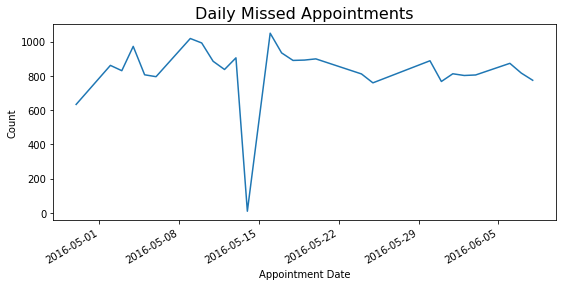

In [37]:
# No-shows
no_show.groupby('appointment_day')['patient_id'].count().plot.line();
add_labels('Daily Missed Appointments', 'Appointment Date', 'Count');

* We see a marked reduction in patient attendance and a corresponding reduction in missed appointments around the 14th of May, 2016. This corresponds to the only Saturday that had scheduled appointments in the dataset.
* There's otherwise a daily variation of about 500-1000 patients for met appointments and 200 for missed appointments.

### Are those who received SMS more likely to attend their appointments?

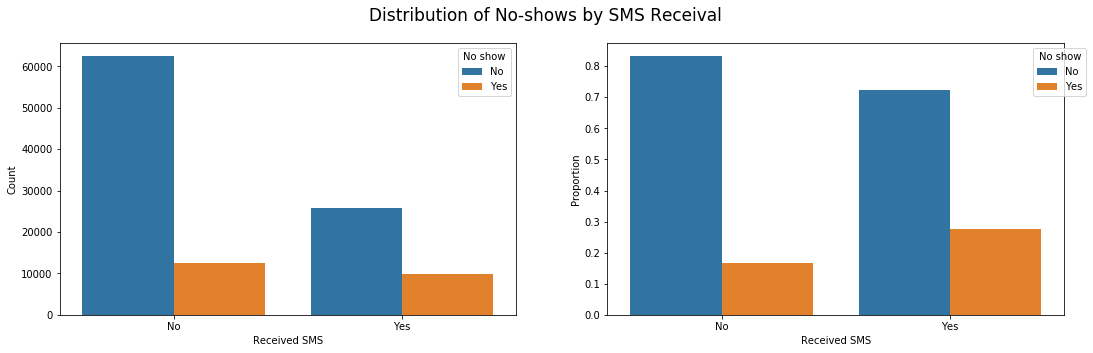

In [38]:
sms_appt_cnts, sms_appt_props = get_counts_props(['sms_received', 'no_show'])

# Plot
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(x='sms_received', y='patient_id', hue='no_show', data=sms_appt_cnts.reset_index())
add_labels(xlabel='Received SMS', ylabel='Count')
plt.legend(title='No show', loc=1);

plt.subplot(122)
sns.barplot(x='sms_received', y='patient_id', hue='no_show', data=sms_appt_props.reset_index())
add_labels(xlabel='Received SMS', ylabel='Proportion')
plt.legend(title='No show', bbox_to_anchor=(1.06, 1))
plt.suptitle('Distribution of No-shows by SMS Receival', fontsize=17);

* Those who received an SMS regarding their appointment were more surprisingly more likely to miss their appointments.

<a id='conclusions'></a>
## Conclusions

> From the exploration done above, we see that although more females are captured in the dataset, the ratio of missed to met appointments is approximately 80:20. This same relationship is seen when viewing proportions of met to missed appointments (show to no-show) aggregated over the days of the week, despite certain days having more appointments met than others. This suggests that gender and particular days of the week cannot be associated with increased likelihood of missing appointments.

> There are however two insights that need further exploration. The increased likelihood of teenagers missing their appointments and the observation that those who receive SMS messages about appointments tend to miss their appointments more.
Further exploration of why there are only 39 appointments scheduled for a particular Saturday (the only Saturday recorded in the dataset) could yield further insight. It would also be a good idea to explore reasons for 5-month appointments as seen in the data. Informations gotten from these might lead to a decision to remove these rows from the data.


### Limitations

> Even though appointments were scheduled over almost a year, dates of appointments captured in the dataset were restricted to just over a month. A longer date range for appointments would lend itself to better and more useful analysis.
Only descriptive analytical techniques were used for this project. Analysis with inferential statistical techniques or machine learning modelling is needed before insights can be confirmed or relied on.


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0